# Pandas II: Manipulating data frames

Last time we learned about the ability of Python to store and manipulate tabular data with the Pandas package.

Tabular data is quite common in genomic analyses.  You can imagine wanting to create and manipulate a table like the following:

| Gene | expression in condition 1 | expression in condition 2 | log2 fold change | pvalue |
|------|---------------------------|---------------------------|------------------|--------|
|GeneA |       100                 | 200                       |        1         |   6e-5 |
|GeneB |    50                     | 12.5                      |        -2        |  2e-6  |
|GeneC |       40                  |   45                      |   0.17           | 0.55   |


Ending up with a table like this often involves **merging** smaller tables together, **selecting** different columns of data from a data frame, **filtering** for rows that match specific conditions, manipulating the **shape** of the table between long and wide formats, and finally, plotting outputs.

In this lesson, we will learn how to perform each of these tasks.  

In [1]:
#For everything we need today, we will need pandas so let's import it.

import pandas as pd

## Selecting rows based on conditions

We've learned how to select data (columns and/or rows) based on their positions within a dataframe or the names of the columns/rows.  Now we will discuss how to select rows based on whether or not their values meet certain conditions.

For example, say we wanted to select all genes whose expression level in condition 1 was at least 20.

This can be done using the **.query** method.

Query accepts a string as an argument.  Pandas parses this string to evaluate whether or not rows meet the conditions within the string.  Standard boolean operators like **and** and **or** can be used within the string as **&** and **|**, respectively.

In [7]:
#Defining the dataframe (a dictionary)
d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}
    
df = pd.DataFrame(data = d)
print(df.head())

#Select rows whose expression in condition 1 is 100
newdf = df.query('cond1exp == 100 | cond1exp == 50') #WHOLE ARGUMENT IS IN ONE SET OF QUOTES

print(newdf.head())

    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0    1.00  0.000060
1  GeneB        50      12.5   -2.00  0.000002
2  GeneC        40      45.0    0.17  0.550000
3  GeneD        20      20.0    0.00  1.000000
4  GeneE         1       4.0    2.00  0.150000
    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0     1.0  0.000060
1  GeneB        50      12.5    -2.0  0.000002


In [8]:
#Select rows whose expression in condition 1 is at least 20
newdf = df.query('cond1exp >= 20')

print(newdf.head())

    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0    1.00  0.000060
1  GeneB        50      12.5   -2.00  0.000002
2  GeneC        40      45.0    0.17  0.550000
3  GeneD        20      20.0    0.00  1.000000
5  GeneF      1000     800.0   -0.32  0.001000


In [9]:
#Select rows whose expression in condition 1 is at least 20 and the pvalue is less than 0.05
newdf = df.query('cond1exp >= 20 & pvalue < 0.05')

print(newdf.head())

    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0    1.00  0.000060
1  GeneB        50      12.5   -2.00  0.000002
5  GeneF      1000     800.0   -0.32  0.001000


## Adding new columns

Suppose we wanted to add a new column of data.

This can be done with the **.assign** method.

    newdf = df.assign(colname = <list of column values>)

In [10]:
#Defining the dataframe
d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}
    
df = pd.DataFrame(data = d)
print(df.head())

#Add the expression in a third condition

cond3expvalues = [20, 50, 10, 1000, 10, 2] #these are IN ORDER

newdf = df.assign(cond3exp = cond3expvalues)
print(newdf.head())
#df.insert(3, 'cond3exp', cond3expvalues) DIFFERS from assign BY PUTTING COLUMN IN SPECIFIC PLACE, 3 is the index
print(df.head())

    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0    1.00  0.000060
1  GeneB        50      12.5   -2.00  0.000002
2  GeneC        40      45.0    0.17  0.550000
3  GeneD        20      20.0    0.00  1.000000
4  GeneE         1       4.0    2.00  0.150000
    Gene  cond1exp  cond2exp  log2FC    pvalue  cond3exp
0  GeneA       100     200.0    1.00  0.000060        20
1  GeneB        50      12.5   -2.00  0.000002        50
2  GeneC        40      45.0    0.17  0.550000        10
3  GeneD        20      20.0    0.00  1.000000      1000
4  GeneE         1       4.0    2.00  0.150000        10
    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0    1.00  0.000060
1  GeneB        50      12.5   -2.00  0.000002
2  GeneC        40      45.0    0.17  0.550000
3  GeneD        20      20.0    0.00  1.000000
4  GeneE         1       4.0    2.00  0.150000


Suppose we wanted to add a new column, but it's values were based on the values of other columns.  Let's say we wanted to add a new column called 'otherlog2FC'.  This is the same as the log2FC we currently have, but instead of log2(cond2exp / cond1exp), we want it to be log2(cond1exp/cond2exp).

In [13]:
import numpy as np

#A new log2FC column

#First we need to get a list of the values that will make up our new column
cond1exp = df['cond1exp'] # (add .tolist() at end to change to list. this is a pandas series of the values in the cond1exp column, essentially a one-column dataframe
cond2exp = df['cond2exp']
#print(cond1exp)
#print(cond2exp)
newlog2FCvalues = np.log2(cond1exp / cond2exp)
print(newlog2FCvalues)

#Now add these values as a new column
newdf = df.assign(newlog2FC = newlog2FCvalues) #(name = values)
print(newdf.head())

0   -1.000000
1    2.000000
2   -0.169925
3    0.000000
4   -2.000000
5    0.321928
dtype: float64
    Gene  cond1exp  cond2exp  log2FC    pvalue  newlog2FC
0  GeneA       100     200.0    1.00  0.000060  -1.000000
1  GeneB        50      12.5   -2.00  0.000002   2.000000
2  GeneC        40      45.0    0.17  0.550000  -0.169925
3  GeneD        20      20.0    0.00  1.000000   0.000000
4  GeneE         1       4.0    2.00  0.150000  -2.000000


## Adding new rows

Adding new rows is essentially the same as appending one data frame (even if it's only one row long) to the end of another data frame.  Not surprisingly, then, this is done with the **.append** method.


In [16]:
#We now have data for GeneG

d = {'Gene': ['GeneG'], 'cond1exp': [10], 'cond2exp': [40], 'log2FC' : [2], 'pvalue' : [4e-5]}
df2 = pd.DataFrame(data = d)
print(df2.head(), '\n\n\n\n')

#Add df2 to the bottom of df
newdf = df.append(df2)
print(newdf, '\n\n\n\n')

#Oh no, df2 kept it's original index (0)! We want it to have a new index based on its position in the new df
newdf = df.append(df2, ignore_index = True)
print(newdf)

    Gene  cond1exp  cond2exp  log2FC   pvalue
0  GeneG        10        40       2  0.00004 




    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0    1.00  0.000060
1  GeneB        50      12.5   -2.00  0.000002
2  GeneC        40      45.0    0.17  0.550000
3  GeneD        20      20.0    0.00  1.000000
4  GeneE         1       4.0    2.00  0.150000
5  GeneF      1000     800.0   -0.32  0.001000
0  GeneG        10      40.0    2.00  0.000040 




    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0    1.00  0.000060
1  GeneB        50      12.5   -2.00  0.000002
2  GeneC        40      45.0    0.17  0.550000
3  GeneD        20      20.0    0.00  1.000000
4  GeneE         1       4.0    2.00  0.150000
5  GeneF      1000     800.0   -0.32  0.001000
6  GeneG        10      40.0    2.00  0.000040


## Iterating through rows

Perhaps you want to iterate through rows, performing some kind of action on the data in each row.  To do this, we can use the **.iterrows()** method.  This returns a generator which yields both the index and the row.

In [19]:
#Defining the dataframe
d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}
    
df = pd.DataFrame(data = d)
#print(df)

#For each row, print the cond1exp value and cond2exp value
for index, row in df.iterrows():
    print(row['cond1exp'], row['cond2exp'])

#You can use this to add columns if you like
#Think of index as the rowname
for (index, row) in df.iterrows(): #index, row is a tuple but odn't need the parentheses
    print('index = ', index, 'row = ', row)
    totalexpression = row['cond1exp'] + row['cond2exp']
    #Add this as a new column named 'totexp' using .loc.
    if totalexpression < 50:
        df.loc[index, 'totexp'] = 'low'
    elif totalexpression >= 50 and totalexpression < 100:
        df.loc[index, 'totexp'] = 'medium'
    elif totalexpression > 100:
        df.loc[index, 'totexp'] = 'high'
    
print(df)

100 200.0
50 12.5
40 45.0
20 20.0
1 4.0
1000 800.0
index =  0 row =  Gene        GeneA
cond1exp      100
cond2exp      200
log2FC          1
pvalue      6e-05
Name: 0, dtype: object
index =  1 row =  Gene        GeneB
cond1exp       50
cond2exp     12.5
log2FC         -2
pvalue      2e-06
Name: 1, dtype: object
index =  2 row =  Gene        GeneC
cond1exp       40
cond2exp       45
log2FC       0.17
pvalue       0.55
Name: 2, dtype: object
index =  3 row =  Gene        GeneD
cond1exp       20
cond2exp       20
log2FC          0
pvalue          1
Name: 3, dtype: object
index =  4 row =  Gene        GeneE
cond1exp        1
cond2exp        4
log2FC          2
pvalue       0.15
Name: 4, dtype: object
index =  5 row =  Gene        GeneF
cond1exp     1000
cond2exp      800
log2FC      -0.32
pvalue      0.001
Name: 5, dtype: object
    Gene  cond1exp  cond2exp  log2FC    pvalue  totexp
0  GeneA       100     200.0    1.00  0.000060    high
1  GeneB        50      12.5   -2.00  0.000002  mediu

In [20]:
mylist = [1, 2, 3, 4, 5]

for ind, x in enumerate(mylist):
    print(ind, x)

0 1
1 2
2 3
3 4
4 5


## Merging dataframes together

Often it is useful to combine datasets together.  For example, let's say someone else did a similar experiment.  You might want to take their data and compare it to yours to see how similar it is.  You can do this by merging your tables together.  This must be done on a key.  For example, say your data is below:

| Gene | expression in condition 1 | expression in condition 2 | log2 fold change | pvalue |
|------|---------------------------|---------------------------|------------------|--------|
|GeneA |       100                 | 200                       |        1         |   6e-5 |
|GeneB |    50                     | 12.5                      |        -2        |  2e-6  |
|GeneC |       40                  |   45                      |   0.17           | 0.55   |
|GeneD |       20                  |   20                      |   0.00           | 1.00   |
|GeneE |        1                  |   4                       |   2.00           | 0.15   |
|GeneF |       1000                |   800                     |   -0.32          | 0.001  |

and your friend's data looks like this:

| Gene | expression in condition 1 | expression in condition 2 | log2 fold change | pvalue |
|------|---------------------------|---------------------------|------------------|--------|
|GeneA |       120                 | 210                       |        0.81         |   2e-3 |
|GeneB |    50                     | 25                      |        -1        |  1e-4  |
|GeneC |       30                  |   25                      |   0.26           | 0.43   |
|GeneD |       20                  |   30                      |   -0.58           | 0.25   |
|GeneE |        2                  |   5                       |   1.32           | 0.31   |
|GeneF |       950                |   600                     |   -0.66          | 0.005  |

It might be useful to combine these into one table so that you can look at all the values for a particular gene at once.

This can be handled with the **.merge** function.  Merge requires a 'key' (or keys) to merge on.  These are the items that you want to use a reference points that join the two dataframes.  In this case, a key that makes sense is 'Gene'.  We want each row to be one gene followed by all the data associated with it.

    mergeddf = pd.merge(leftdf, rightdf, how = <string>, on = <string or list>)
    
The 'how' argument wants a string telling how the merge should be done.  The options are (left, right, outer, inner).  More on that in a bit.  The on argument is the name of the column you intend to use as the key for merging.  In this case, we would like it to be 'Gene'.  If you would like to join on two or more keys simultaneously, provide multiple strings in a list.

### 'How' to merge

As stated above, the four ways you can join your tables together are left, right, outer, and inner.  These have to do with dealing with keys that are present in one table but not the other.  Joining 'left' will return a merged dataframe that only has keys (rows) that were present in the left table.  Those that were present in the right table *but not in the left table* are not included here.  Joining 'right' works similarly but only includes keys that were present in the right table.  Joining 'inner' only includes keys that are present in both (the intersection).  Joining 'outer' includes keys that were present in either (the union).  
![alt text](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg "Title")

In this first example of merging our two gene expression tables together, how we join them does not matter since every key in one table is also present in the other.  However, you can imagine scenarios (essentially every time you would want to do this with real data) where this would not be the case.

In [30]:
#Merge your two dataframes using the gene names as the key.

d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}

df = pd.DataFrame(data = d) #your data

d2 = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [120, 50, 30, 20, 2, 950],
    'cond2exp' : [210, 25, 25, 30, 5, 600],
    'log2FC' : [0.81, -1, 0.26, -0.58, 1.32, 0.66],
    'pvalue' : [2e-3, 1e-4, 0.43, 0.25, 0.31, 0.005]}

df2 = pd.DataFrame(data = d2) #your friend's data

mergeddf = pd.merge(df, df2, how = 'left', on = 'Gene')

mergeddf

,Gene,cond1exp_x,cond2exp_x,log2FC_x,pvalue_x,cond1exp_y,cond2exp_y,log2FC_y,pvalue_y
0,GeneA,100,200.0,1.00,0.000060,120,210,0.81,0.0020
1,GeneB,50,12.5,-2.00,0.000002,50,25,-1.00,0.0001
2,GeneC,40,45.0,0.17,0.550000,30,25,0.26,0.4300
3,GeneD,20,20.0,0.00,1.000000,20,30,-0.58,0.2500
4,GeneE,1,4.0,2.00,0.150000,2,5,1.32,0.3100
5,GeneF,1000,800.0,-0.32,0.001000,950,600,0.66,0.0050


Looks good, but if possible, I'd like to know which value came from my experiment and which came from my friends.  Right now, these are indicated by the _x and _y suffixes, but we can give more meaningful suffixes.

In [21]:
mergeddf = pd.merge(df, df2, how = 'left', on = 'Gene', suffixes = ['_mine', '_myfriends'])

mergeddf

,Gene,cond1exp_mine,cond2exp_mine,log2FC_mine,pvalue_mine,totexp,cond1exp_myfriends,cond2exp_myfriends,log2FC_myfriends,pvalue_myfriends
0,GeneA,100,200.0,1.00,0.000060,high,NaN,NaN,NaN,NaN
1,GeneB,50,12.5,-2.00,0.000002,medium,NaN,NaN,NaN,NaN
2,GeneC,40,45.0,0.17,0.550000,medium,NaN,NaN,NaN,NaN
3,GeneD,20,20.0,0.00,1.000000,low,NaN,NaN,NaN,NaN
4,GeneE,1,4.0,2.00,0.150000,low,NaN,NaN,NaN,NaN
5,GeneF,1000,800.0,-0.32,0.001000,high,NaN,NaN,NaN,NaN


## Reshaping data

In general, tabular data can either be in 'wide' or 'long' format.  These are illustrated below:

This is a 'wide' table.  Each data variable has its own column.  It's perhaps more human readable, but addition of a new variable will require the creation of a new column.  

| Name | Age | Weight |
|------|---------------------------|---------------------------|
|Bob |       32                 | 128                       |
|Alice |    24                     | 86                      |
|Steve |       64                  |   95                     |


Most of the time, when you have multiple variables related to a single item, it can be easier to have the data in 'long' format.

| Name | Variable | Value |
|------|---------------------------|---------------------------|
|Bob |       Age                 | 32                       | 
|Bob |    Weight                 | 128                      |
|Alice |       Age                  |   24                      | 
|Alice |       Weight                 |   86                      | 
|Steve |        Age              |   64                       | 
|Steve |       Weight                |   95                     | 

This is the same data, just in a different form.  Addition of a new variable (say...gender) does not require the creation of a new column. Most plotting functions will prefer a table in long format over wide format.

The **melt()** function easily transforms wide data to long data.

    melteddf = pd.melt(df, id_vars, value_vars)
    
id_vars is a list of the column (or columns) you wish to use as the identifier.  In the example above, this would be ['Name'].  value_vars is a list of the column (or columns) you wish to retain values of.  In the example above, this would be ['Age', 'Weight'].  By default, this is all columns that are *not* in the id_vars list.



In [22]:
#Melt our gene expression df, keeping the data associated with each variable

d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}

df = pd.DataFrame(data = d)
print(df, '\n\n\n\n')

melteddf = pd.melt(df, id_vars = ['Gene'], value_vars = ['cond1exp', 'cond2exp', 'log2FC', 'pvalue'])
print(melteddf)

    Gene  cond1exp  cond2exp  log2FC    pvalue
0  GeneA       100     200.0    1.00  0.000060
1  GeneB        50      12.5   -2.00  0.000002
2  GeneC        40      45.0    0.17  0.550000
3  GeneD        20      20.0    0.00  1.000000
4  GeneE         1       4.0    2.00  0.150000
5  GeneF      1000     800.0   -0.32  0.001000 




     Gene  variable        value
0   GeneA  cond1exp   100.000000
1   GeneB  cond1exp    50.000000
2   GeneC  cond1exp    40.000000
3   GeneD  cond1exp    20.000000
4   GeneE  cond1exp     1.000000
5   GeneF  cond1exp  1000.000000
6   GeneA  cond2exp   200.000000
7   GeneB  cond2exp    12.500000
8   GeneC  cond2exp    45.000000
9   GeneD  cond2exp    20.000000
10  GeneE  cond2exp     4.000000
11  GeneF  cond2exp   800.000000
12  GeneA    log2FC     1.000000
13  GeneB    log2FC    -2.000000
14  GeneC    log2FC     0.170000
15  GeneD    log2FC     0.000000
16  GeneE    log2FC     2.000000
17  GeneF    log2FC    -0.320000
18  GeneA    pvalue     0.000060
19  Ge

## Plotting

OK so we've done our analysis, we've filtered and merged our dataframe so it's just like we want.  Now it's time for the payoff: plotting.  There are a few plotting packages written for Python, but we will be using **seaborn**.  It is still being actively developed, is reasonably mature, and is definitely the most beautiful.  You can read more about everything seaborn can do at https://seaborn.pydata.org/.

For now, we are just going to get our feet wet by making some simple plots.  The seaborn tutorial (https://seaborn.pydata.org/tutorial.html) is quite good, and to be honest, better than what we could cover ourselves here.  We will focus here on making plots of our toy data to get you initiated.

Seaborn plots can take pandas dataframes as inputs in the 'data' argument.  Let's try to make a barplot of our gene expression values.

> Note: this is not a particularly good analysis.  Don't do it in your next paper.  This is just for fun.

As a reminder, here's our data again:

| Gene | expression in condition 1 | expression in condition 2 | log2 fold change | pvalue |
|------|---------------------------|---------------------------|------------------|--------|
|GeneA |       100                 | 200                       |        1         |   6e-5 |
|GeneB |    50                     | 12.5                      |        -2        |  2e-6  |
|GeneC |       40                  |   45                      |   0.17           | 0.55   |
|GeneD |       20                  |   20                      |   0.00           | 1.00   |
|GeneE |        1                  |   4                       |   2.00           | 0.15   |
|GeneF |       1000                |   800                     |   -0.32          | 0.001  |

> Note 2: After we are done with the code to make the plot, we need one more line, plt.show(), to get the plot to actually show.  Many aesthetic details (axis labels, grids, etc.) can be added to the plot after making it, but before showing it.  Seaborn is based on an earlier plotting package called matplotlib.  Aesthetic changes to seaborn plots can therefore be made with matplotlib commands.

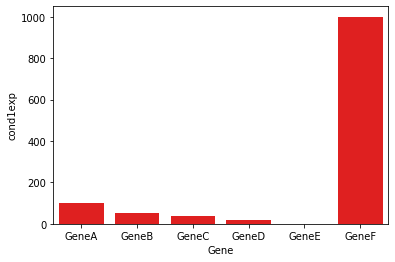

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#Our data
d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}

df = pd.DataFrame(data = d)

#We want a 'barplot'

#myplot = sns.barplot(data = df, x = 'Gene', y = 'cond1exp')
#plt.show()

#Nice, but I like red bars.
myplot = sns.barplot(data = df, x = 'Gene', y = 'cond1exp', color = 'red')
plt.show()


Not bad.  But let's say I want to see their expression in condition1 *and* condition2 in the same plot.  You'll notice that in the sns.barplot() call, there is only *x* and *y* arguments that determine what goes on each axis.  So, with the table as it is now, how can we show **both** conditions?  The short answer is you can't.  However, if we reorganized the table a bit, we could.  In fact, if we **melted** this table to it from wide into long data, we could.  See why below.

This is our original data:

| Gene | cond1exp | cond2exp | log2FC | pvalue |
|------|---------------------------|---------------------------|------------------|--------|
|GeneA |       100                 | 200                       |        1         |   6e-5 |
|GeneB |    50                     | 12.5                      |        -2        |  2e-6  |
|GeneC |       40                  |   45                      |   0.17           | 0.55   |
|GeneD |       20                  |   20                      |   0.00           | 1.00   |
|GeneE |        1                  |   4                       |   2.00           | 0.15   |
|GeneF |       1000                |   800                     |   -0.32          | 0.001  |

It's obvious that the x axis should be 'Gene', but what should the y axis be?  Condition1 or condition2? Remember that we'd like to show both on the same plot.  If we melted the table to make it long we would come up with this:

| Gene | variable | value |
|------|---------------------------|---------------------------|
|GeneA |       cond1exp                 | 100                       |
|GeneB |    cond1exp                     | 50                      |
|GeneC |       cond1exp                  |   40                      |
|GeneD |       cond1exp                  |   20                      |
|GeneE |        cond1exp                  |   1                       |
|GeneF |       cond1exp                |   1000                     |
|GeneA |       cond2exp                |   200                     |
|GeneB |       cond2exp                |   12.5                     |
|GeneC |       cond2exp                |   45                     |
|GeneD |       cond2exp                |   20                     |
|GeneE |       cond2exp                |   4                     |
|GeneF |       cond2exp                |   800                     |

Now, the x axis can still be 'Gene' and the y axis can be 'value'.  All we need to do then is come up with a way of differentiating based on the value in 'variable'.


     Gene  variable   value
0   GeneA  cond1exp   100.0
1   GeneB  cond1exp    50.0
2   GeneC  cond1exp    40.0
3   GeneD  cond1exp    20.0
4   GeneE  cond1exp     1.0
5   GeneF  cond1exp  1000.0
6   GeneA  cond2exp   200.0
7   GeneB  cond2exp    12.5
8   GeneC  cond2exp    45.0
9   GeneD  cond2exp    20.0
10  GeneE  cond2exp     4.0
11  GeneF  cond2exp   800.0


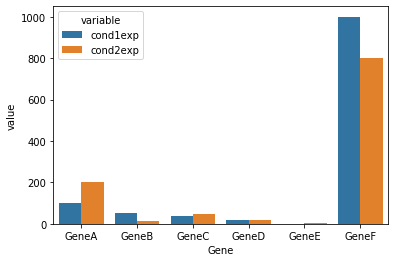

In [24]:
d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}

df = pd.DataFrame(data = d)

#Melt df

melteddf = pd.melt(df, id_vars = ['Gene'], value_vars = ['cond1exp', 'cond2exp'])
print(melteddf)

myplot = sns.barplot(data = melteddf, x = 'Gene', y = 'value', hue = 'variable')
plt.show()

Not bad.  Maybe instead we want to make a boxplot of all the genes within a sample.  

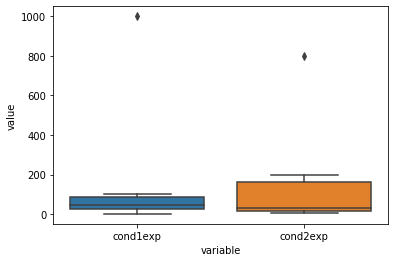

In [25]:
d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}

df = pd.DataFrame(data = d)

#Melt df

melteddf = pd.melt(df, id_vars = ['Gene'], value_vars = ['cond1exp', 'cond2exp'])
#print(melteddf)
sns.boxplot(data = melteddf, x = 'variable', y = 'value')
plt.show()

Alright, now what about a scatter for comparing values from the two conditions?

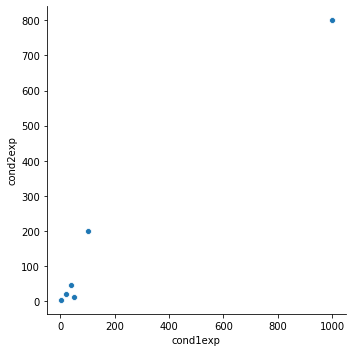

In [26]:

d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}

df = pd.DataFrame(data = d)

#No need to melt this time.  x = cond1, y = cond2

#plot their relation with a relplot

sns.relplot(data = df, x = 'cond1exp', y = 'cond2exp')
plt.show()

## A message about overplotting

Scatterplots are common in genomic analysis.  Often, you are dealing with tens or hundreds of thousands of observations, and scatterplots are quick and easy ways to look for relationships between variables.  However, they should be used with some caution.  One common pitfall of this type of plot is overplotting.  This occurs when the density of points on a plot obscures the true nature of the data.

Consider the scatterplot below.  It seems obvious that there is a correlation between x and y (there is).  It also looks like the density of the data in the x direction is more or less constant between x = 0 and x = 6.

![alt text](scatter.png)

However, this is misleading.  It would be nice to somehow represent the density of the dots at each location.  This would give us information about how much of the data lies at each point.  One way this can be done is by using a hexbin plot.  We aren't going to get into how to make them right now, but you can read their documentation [here](https://seaborn.pydata.org/examples/hexbin_marginals.html).

Using this approach, we can see that, in actuality, the vast majority of the data is contained between x = 0 and x = 2.  

![hexbin](hexbin.png)

# Exercises

## Exercise 1

Often, it's not a good idea to work on raw expression values.  Work on tranformed (for example, log-transformed) can sometimes be more informative (if not more mathematically correct).  The scatter plot we produced to compare gene expression values in conditions 1 and 2 is a good example.  It would be better to instead look at the correlation between logged (let's say log10) values.  Produce a scatter plot comparing the logged expression values.

Hints:
- Add two new columns to the dataframe that contain the logged values in conditions 1 and 2, respectively.
- You may (will) need the numpy.log10() function.

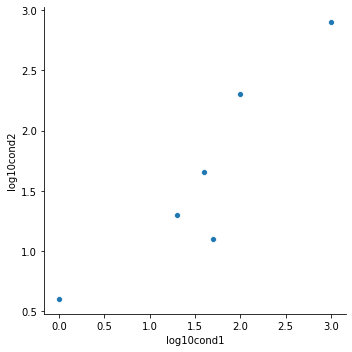

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#get df
d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}

df = pd.DataFrame(data = d)
#print(df)


#add new columns to df with log10 exp values

cond1exp = df['cond1exp'] 
cond2exp = df['cond2exp']
loggedcon1 = np.log10(cond1exp)
loggedcon2 = np.log10(cond2exp)

newdf = df.assign(log10cond1 = loggedcon1).assign(log10cond2 = loggedcon2) 
#print(newdf.head())


#make scatter plot: log10(cond1) vs log10(cond2)

sns.relplot(data = newdf, x = 'log10cond1', y = 'log10cond2')
plt.show()


## Exercise 2

Your friend has done a very similar experiment, looking at the expression of the same genes in the same conditions.  You might like to know how well your two datasets agree with each other.  One way to do this would be to correlate the log2 fold changes that you observed with the log2 fold changes that your friend observed.  Write code to obtain the Spearman correlation coefficient for your two log2 fold changes.  

Now, is the correlation stronger or weaker than what you would expect by chance?  One way to find this out would be to randomize your data and get correlations for the random data.  If you did this many times (say, 500 times) you could see where your real correlation coefficient fell within the distribution of control random correlations.  Write code to do this, finishing with a z-score comparison of the real correlation coefficient and the random values.

> Note: A z-score compares a single value (like your real corrleation) to a distribution of other values (like all the random correlations).  Lets define your single value as x and the distribution of the other values as y.  The z-score is defined as (x - mean(y)) / (standarddeviation(y))

Hints:
- You can get the spearman correlation between two lists of numbers using scipy.stats.spearmanr().  This function assumes that the order of the values in each list is paired. Think of it like a scatter plot.  For each point, the value in the first list is the x coordinate and the value in the second list is its y coordinate.
- You can randomly shuffle the order of values within a list using shuffle(), which is in the random package.  Importantly, this shuffles the list **in place**.
- You can get the mean of a distribution (also known as a list) with mean(), which is in the numpy package.
- You can get the standard deviation of a distribution (also known as a list) with std(), which is in the numpy package.


In [18]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from random import shuffle
from scipy import stats

#Your data
d = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [100, 50, 40, 20, 1, 1000],
    'cond2exp' : [200, 12.5, 45, 20, 4, 800],
    'log2FC' : [1, -2, 0.17, 0.00, 2.00, -0.32],
    'pvalue' : [6e-5, 2e-6, 0.55, 1.00, 0.15, 0.001]}

#Your friend's data
d2 = {'Gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'cond1exp' : [120, 50, 30, 20, 2, 950],
    'cond2exp' : [210, 25, 25, 30, 5, 600],
    'log2FC' : [0.81, -1, 0.26, -0.58, 1.32, 0.66],
    'pvalue' : [2e-3, 1e-4, 0.43, 0.25, 0.31, 0.005]}

df = pd.DataFrame(data = d)
df2 = pd.DataFrame(data = d2)

mergeddf = pd.merge(df, df2, how = 'left', on = 'Gene', suffixes = ['_mine', '_myfriends'])

mylog2 = mergeddf['log2FC_mine'].tolist()
theirlog2 = mergeddf['log2FC_myfriends'].tolist()

x = stats.spearmanr(mylog2, theirlog2) #real Spearman's correlation ~0.84 with pval 0.04


#randomize 500x

shuffled_spears = []
i=0
while i<500:
    i=i+1
    shuffle(mylog2)
    shuffle(theirlog2)
    shuffed_r = stats.spearmanr(mylog2, theirlog2)
    shuffled_spears.append(shuffed_r)
shuffled_spears #good, produces a list of 500 Spearman results

y = mean(shuffled_spears) #approx 0.25-0.26 looks good

z = std(shuffled_spears) #approx 0.45 hmm ok


#get z-score

(x-y)/z #works just like (stats.spearmanr(mylog2, theirlog2) - mean(shuffled_spears))/std(shuffled_spears)




array([-1.3132884 ,  0.61790402])